In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as sf
from sklearn import tree
%matplotlib inline
sns.set()

In [52]:
titanik_data = pd.read_csv('titanik_full_data_1.csv', sep = '\t')
titanik_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Разумеется, "Титаник" - датасет, близкий к идеальному, здесь данных вполне достаточно, представлена легенда признаков, и т.п. но этот ноутбук я создаю с образовательной целью.

__PassengerId__ — уникальный ID пассажира

__Survived__ — выжил пассажир или нет (0 - нет, 1 - да)

__Pclass__ — класс каюты (1 - 1-ый класс, 2 - 2-ой класс; 3 - 3-ий класс)

__Name__ — имя пассажира

__Sex__ — пол пассажира (male - мужской, female - женский)

__Age__ — возраст пассажира

__SibSp__ — количество братьев и сестер / супругов за границей 

__Parch__ — количество родителей / детей на борту

__Ticket__ — номер билета

__Fare__ — стоимость билета (британские фунты)

__Cabin__ — номер каюты

__Embarked__ — порт, в котором сел пассажир 

In [4]:
titanik_data.describe()

PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [49]:
#сколько пропущено значений в каждом признаке
titanik_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Age_bin         263
Fare_bin          1
dtype: int64

In [6]:
titanik_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


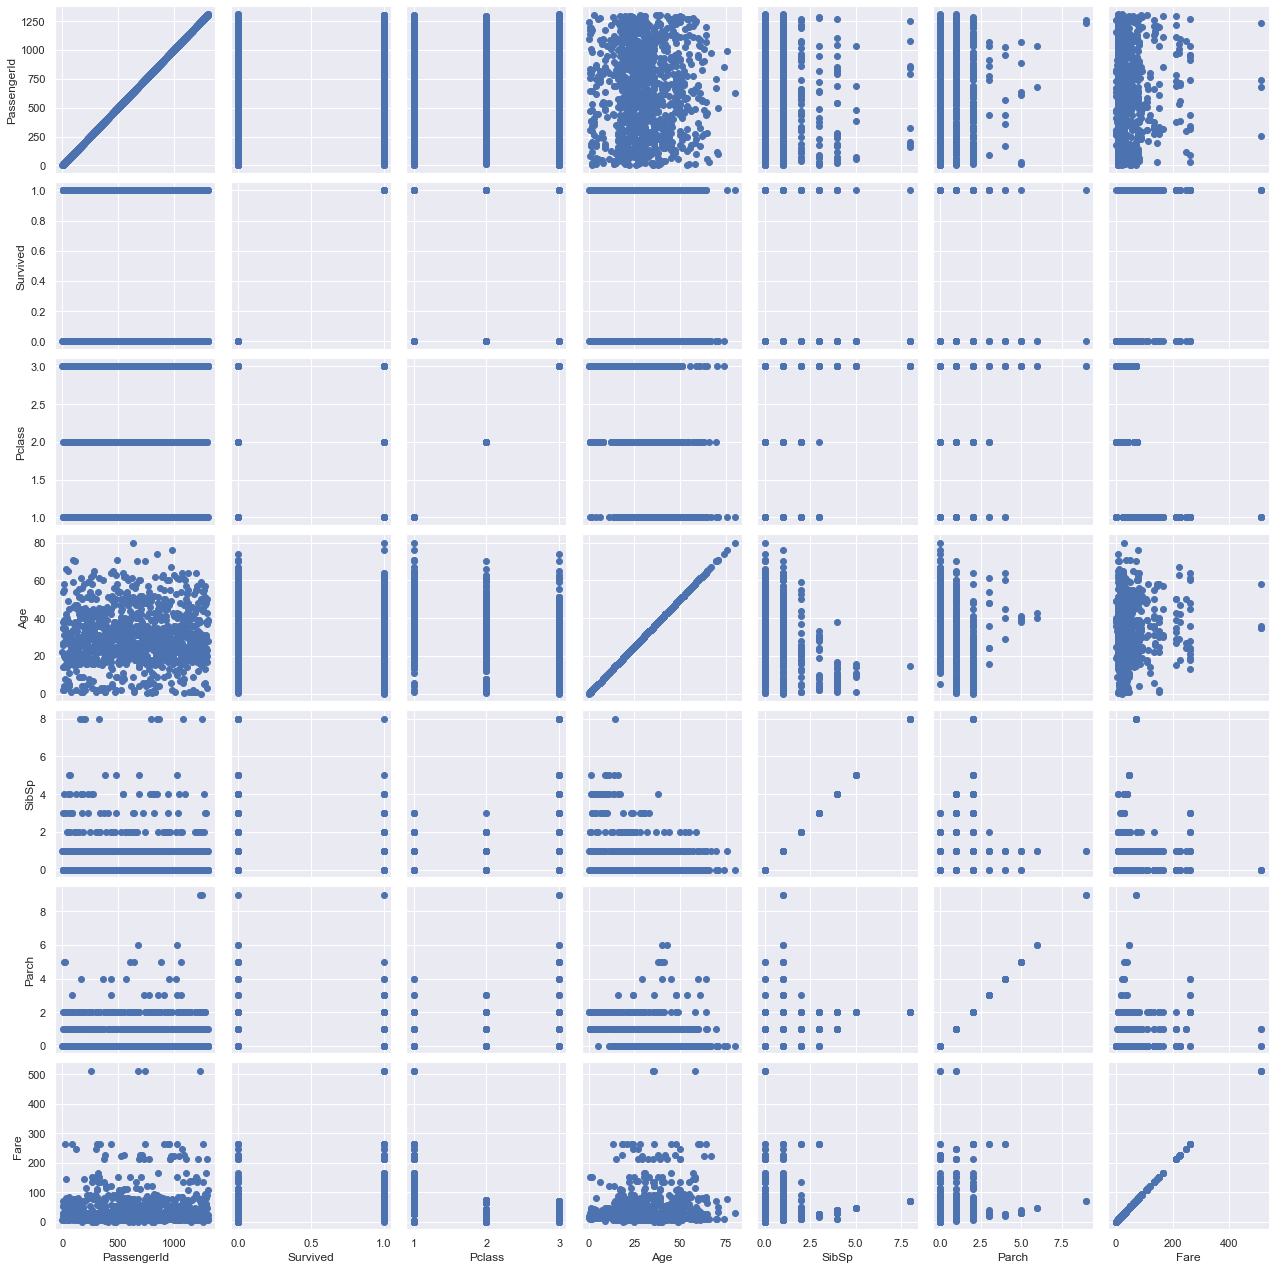

In [7]:
pair_grid_plot = sns.PairGrid(titanik_data)
pair_grid_plot.map(plt.scatter)

In [35]:
#переменные, которые ничего не скажут о вероятности выжить после крушения
titanik_subset = titanik_data.copy()
titanik_subset.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

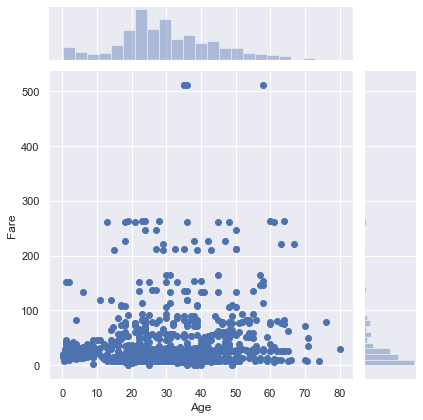

In [36]:
#Ради любопытства можно посмотреть как распределен возраст и стоимость билета. В приницпе эти графики достаточно информативны и позволяют посмотреть на распределение данных
sns.jointplot(x = 'Age', y = 'Fare', data = titanik_data)

0.37738731856378915


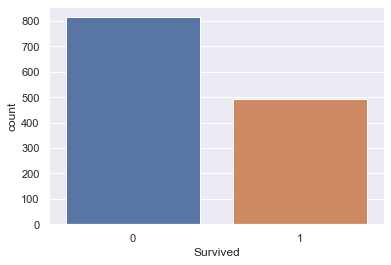

In [10]:
sns.countplot(x = 'Survived', data = titanik_data)

print(titanik_data.Survived.sum()/titanik_data.Survived.count())

#### Влияет ли пол на выживаемость?

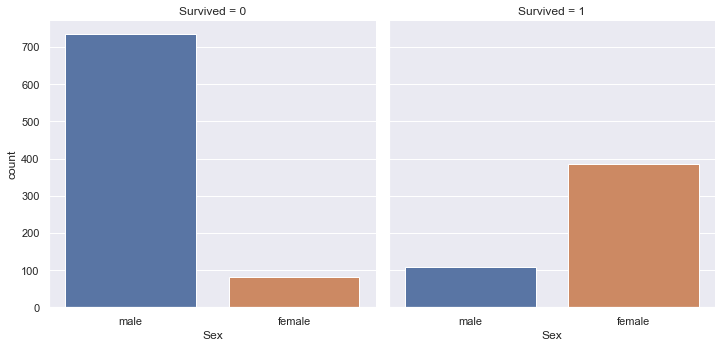

In [11]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = titanik_data)

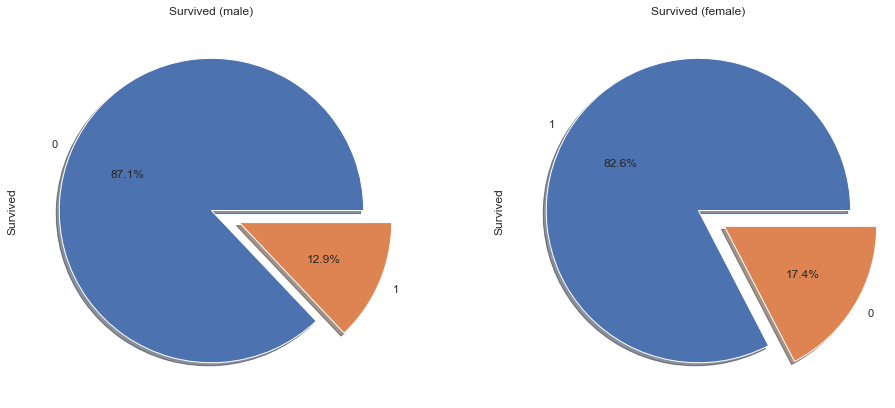

In [12]:
#вариант pie-chart

f,ax=plt.subplots(1,2,figsize=(16,7))
titanik_data['Survived'][titanik_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanik_data['Survived'][titanik_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()


In [15]:
#сводная таблица
pd.crosstab([titanik_data.Sex, titanik_data.Survived], titanik_data.Pclass, margins = True).style.background_gradient(cmap = 'autumn_r')

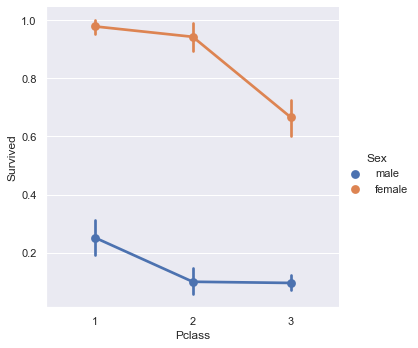

In [16]:
#доля выживших в зависимости от класса кают
sns.catplot('Pclass','Survived',hue = 'Sex', kind = 'point', data = titanik_data)

#### Добавим еще один фактор

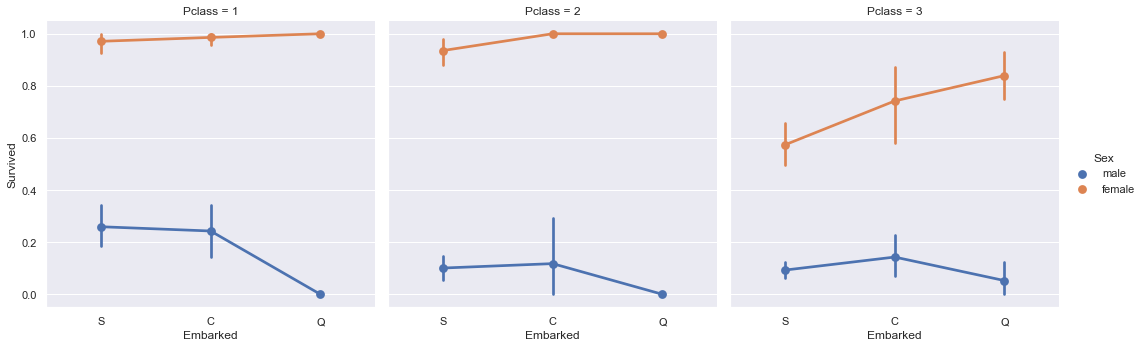

In [19]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data = titanik_data)

#### Сгруппируем возраст пассажиров

In [20]:
titanik_data['Age_bin'] = np.nan
for i in range(8,0,-1):
    titanik_data.loc[titanik_data['Age'] <= i*10, 'Age_bin'] = i

print(titanik_data[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


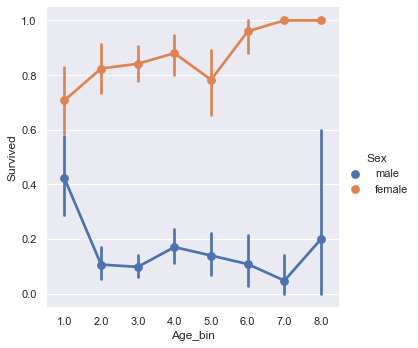

In [21]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data = titanik_data)

In [23]:
#сводная таблица с новой переменной возраста (+ класс)
pd.crosstab([titanik_data.Sex, titanik_data.Survived], [titanik_data.Age_bin, titanik_data.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [27]:
#сделаем еще категорию по стоимости билета
titanik_data['Fare_bin'] = np.nan
for i in range(12,0,-1):
        titanik_data.loc[titanik_data['Fare'] <= i*50, 'Fare_bin'] = i

titanik_data_1 = titanik_data.copy()

titanik_data_1 = pd.get_dummies(titanik_data_1, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
titanik_data_1.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
titanik_data_1.dropna(inplace=True)

#### Создадим корреляционную матрицу всех переменных

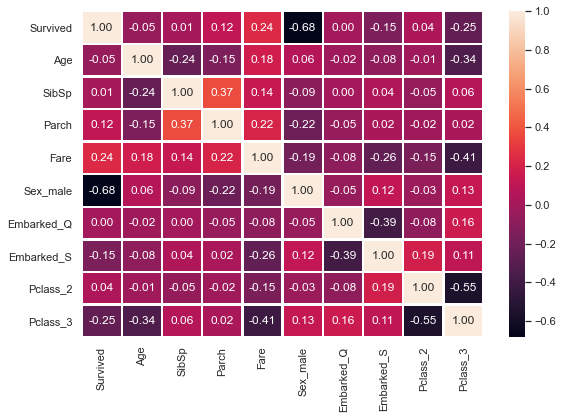

In [28]:
corr = titanik_data_1.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

#### Удобная сводка

In [34]:
from pandas_profiling import ProfileReport
profile = ProfileReport(titanik_data, title = 'Pandas Profiling Report')
profile

# Моделирование

### Биномиальная лог-регрессия :

In [42]:
#C() - категориальные признаки
logit_res = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', titanik_data, family = sm.families.Binomial()).fit()

In [41]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Wed, 14 Oct 2020   Deviance:                       796.42
Time:                        15:39:43   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

`Intercept` - логарифм шансов выжить для женщины в первом классе, которой "0" лет. 

Полученные выводы:

- Все рассмотренные коэффициенты значимы (уровень значимости меньше 0.05)
- Шансы выжить во втором классе ниже, чем в первом, а в третьем ещё ниже
- Шансы выжить у мужчин ниже, чем у женщин
- С возрастом шанс погибнуть увеличивается

### Мультномиальная лог-регрессия :

In [44]:
multi_res = sf.mnlogit('Pclass ~ C(Sex) + Age', titanik_data).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:                  0.1028
Time:                        15:52:29   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

Результат интерпретируем относительно первого класса:

    Мужчин больше во втором, а в третьем ещё больше
    Судя по тому, что интерцепт тоже больше (а в него входят женщины), женщин тоже больше => в других классах просто  больше людей
    У возраста обратная зависимость
Но в конкретно в этой модели ничего нового не узнали после EDA


### Еще раз проделаем манипуляции с данными, чтобы перейти к другим моделям

In [2]:
titanic_data = pd.read_csv("tittan.csv")
titanic_data.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
X = titanic_data.drop(["PassengerId", "Name","Ticket", "Cabin", "Survived"], axis = 1)
#конвертируем строковые переменные в численные для корректной работы классификатора
X = pd.get_dummies(X)
#пропущенные значения в возрасте заменяем на медианный возраст пассажиров
X = X.fillna({"Age" : X.Age.median()})
#созданы два массива X и y для дальнейшего обучения
y = titanic_data.Survived
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [83]:
y = titanic_data.Survived

In [5]:
clsf = tree.DecisionTreeClassifier(criterion="entropy")
clsf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

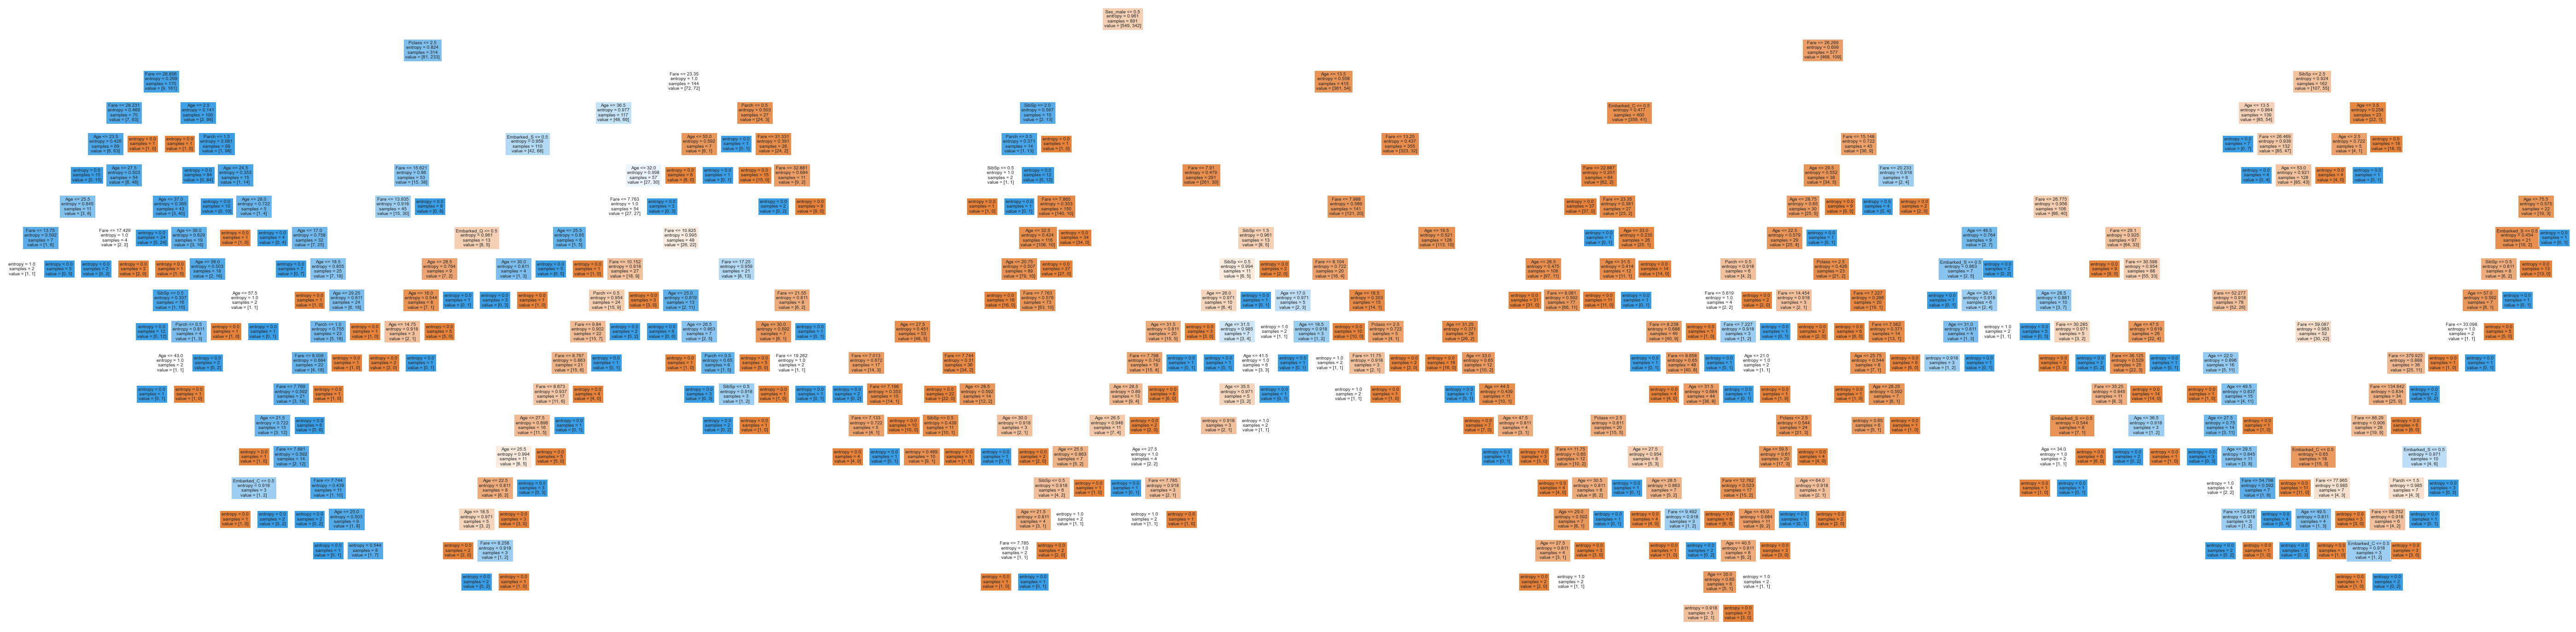

In [6]:
#двойной клик для увеличения картинки
plt.figure(figsize=(100, 25))
tree.plot_tree(clsf, fontsize=10, feature_names=list(X), filled=True);

#### Видно, что дерево слишком сильно переобучилось

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
print(clsf.score(X,y))
#сравним тренировочную, тестовую и исходную выборки по точности
clsf.fit(X_train, y_train)
print(clsf.score(X_train, y_train))
print(clsf.score(X_test, y_test))

0.9102132435465768
0.9798657718120806
0.7796610169491526


## Попробуем подобрать параметры через сетку (GridSearch)

#### И построим AUC-ROC

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [31]:
#сверим оценку на кросс-валидации

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.7864406779661017

In [15]:
clf1 = tree.DecisionTreeClassifier()
parameters = {"criterion": ["gini", "entropy"], "max_depth": range(1,30)}
gridsearch_clf = GridSearchCV(clf1, parameters, cv = 5)
gridsearch_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [16]:
gridsearch_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [21]:
#оценка с наилучшими параметрами
best_clf = gridsearch_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7593220338983051

In [24]:
y_pred = best_clf.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test,y_pred))

0.8191489361702128
0.6416666666666667


### Разберем "вручную" вероятностную часть модели:

In [25]:
#вероятность отнесения к отрицательному(слева) и положительному (справа) классам
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

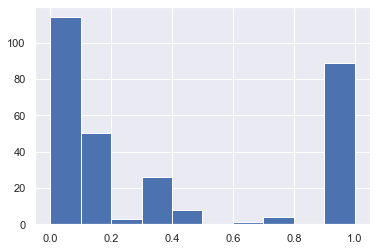

In [26]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [28]:
#зафиксируем на уровне 0.8 вероятность отнесения к метке "1"
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [29]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8314606741573034
0.6166666666666667


#### AUC-ROC

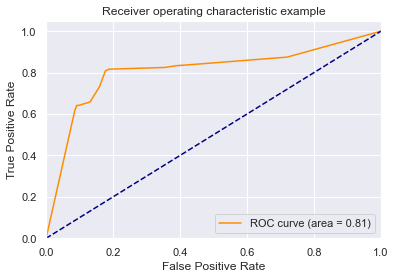

0.808357142857143


In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf_rf = RandomForestClassifier()
parameters = {"n_estimators" : [10, 20 , 30], "max_depth" : [2,5,7,10]}

gridsearch_clf = GridSearchCV(clf_rf, parameters, cv = 5)
gridsearch_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [40]:
best_clf = gridsearch_clf.best_estimator_
print(gridsearch_clf.best_params_)
print(best_clf.score(X_test, y_test))

{'max_depth': 5, 'n_estimators': 20}
0.8203389830508474


In [42]:
#по каким feature деревья делали сплит, чтобы добитсья максимального Information Gain (снижения энтропии)
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({"features": list(X_train),
                                       "feature_importances" : feature_importances})
feature_importances_df.sort_values("feature_importances", ascending = False)

features  feature_importances
6    Sex_male             0.312560
5  Sex_female             0.202767
4        Fare             0.133159
0      Pclass             0.112898
1         Age             0.110704
3       Parch             0.048578
2       SibSp             0.033812
7  Embarked_C             0.020066
9  Embarked_S             0.019005
8  Embarked_Q             0.006451

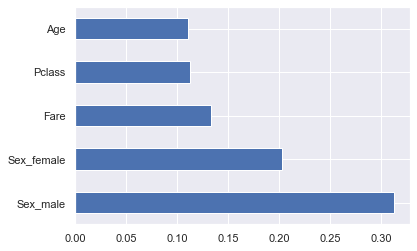

In [45]:
#визуализируем 5 наиболее важных фичей
(pd.Series(feature_importances, index=X.columns)
   .nlargest(5)
   .plot(kind='barh'))